<a href="https://colab.research.google.com/github/AnnaBujniewicz/semester_project/blob/main/uml%2Bdeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To do list:



*   do the backtest
*   change the texts and the figures
*   check the deeplearning if it can be improved
*   check the epocs





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
import gensim
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from datetime import datetime
!pip install lime
from lime.lime_text  import LimeTextExplainer
nltk.download('wordnet')
warnings.filterwarnings('ignore')
from collections import Counter
import itertools
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ztakac18/M2-data/main/yf_chosen_comp.csv')

In [ ]:
df.head()

,Date,TSLA,GOOGL,ALXN,AMZN
0,2019-01-02,62.023998,1054.680054,98.050003,1539.130005
1,2019-01-03,60.071999,1025.469971,100.209999,1500.280029
2,2019-01-04,63.537998,1078.069946,106.000000,1575.390015
3,2019-01-07,66.991997,1075.920044,107.940002,1629.510010
4,2019-01-08,67.070000,1085.369995,108.610001,1656.579956


In [ ]:
df=df.set_index(df['Date'], drop=True).drop('Date', 1)

In [ ]:
df.index.name = 'date'

In [ ]:
df.head()

,TSLA,GOOGL,ALXN,AMZN
date,,,,
2019-01-02,62.023998,1054.680054,98.050003,1539.130005
2019-01-03,60.071999,1025.469971,100.209999,1500.280029
2019-01-04,63.537998,1078.069946,106.000000,1575.390015
2019-01-07,66.991997,1075.920044,107.940002,1629.510010
2019-01-08,67.070000,1085.369995,108.610001,1656.579956


In [ ]:
df.describe()

,TSLA,GOOGL,ALXN,AMZN
count,482.000000,482.000000,482.000000,482.000000
mean,150.484585,1314.788153,112.941784,2190.069459
std,136.893149,178.166206,12.696327,568.962353
min,35.793999,1025.469971,75.559998,1500.280029
25%,51.438498,1170.785034,104.605000,1782.139984
50%,72.090000,1271.710022,111.680000,1898.270020
75%,187.864502,1451.832458,122.407499,2539.780029
max,585.760010,1787.020020,141.300003,3531.449951


#Tesla

In [ ]:
tsla=df.loc[:,['TSLA']]

In [ ]:
tsla=tsla.rename(columns={"TSLA": "close"})

In [ ]:
# creating a minmaxscaler instance
# minmax scaler was chosen as it deals very well with non-normally distributed data
scaler = MinMaxScaler(feature_range=(0, 1))
# scaling the close column
tsla['close'] = scaler.fit_transform(tsla['close'].values.reshape(-1,1))

In [ ]:
# creating a new column in the dataframe that consists of the same values as the scaled close column
tsla["close-25"] = tsla["close"]
# shifting the column 25 days back (so roughly a month as we exclude weekends)
tsla["close-25"] = tsla["close-25"].shift(25)
# inspecting the dataframe
tsla.head()

,close,close-25
date,,
2019-01-02,0.047694,NaN
2019-01-03,0.044145,NaN
2019-01-04,0.050447,NaN
2019-01-07,0.056727,NaN
2019-01-08,0.056869,NaN


In [ ]:
# constructing train and test sets, where the test sets contain all the data other than the last 25 periods
X_train_tsla = tsla["close-25"][25:int(len(tsla["close-25"])-25)]
X_test_tsla = tsla["close-25"][int(len(tsla["close-25"])-25):]
y_train_tsla = tsla["close"][25:int(len(tsla["close-25"])-25)]
y_test_tsla = tsla["close"][int(len(tsla["close-25"])-25):]

In [ ]:
# reshaping the train and test values
X_train_tsla = X_train_tsla.values.reshape(-1,1)
X_test_tsla = X_test_tsla.values.reshape(-1,1)
y_train_tsla = y_train_tsla.values.reshape(-1,1)

###2.1 Random Forest

In [ ]:
# creating a grid for the grid search for the random forest regressor
grid = {'n_estimators': list(range(10,101,10)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(10,101,10)),
               'bootstrap': [True, False]}

In [ ]:
# creating a random forest regressor instance
rf = RandomForestRegressor()
# creating a grid search instance with 5 cross validation splits
search = GridSearchCV(rf, grid, cv=5)

In [ ]:
# fitting the search to the training set
search.fit(X_train_tsla, y_train_tsla)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# printing out the best parameters and their score
# the score is really bad
print(search.best_params_)
print(search.best_score_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 10}
-7.954966479092798


In [ ]:
# creating a regression with the selected parameters
rf_tsla = RandomForestRegressor(bootstrap= True, max_depth = 10, max_features = "sqrt", n_estimators = 60)
# fitting it to the training set
rf_tsla.fit(X_train_tsla, y_train_tsla)
# predicting the values
y_pred_tsla = rf_tsla.predict(X_test_tsla)

In [ ]:
# creating a new column in the dataframe
tsla["pred"] = np.nan
# filling the column with the predicted values
tsla["pred"][int(len(tsla["close-25"])-25):] = y_pred_tsla

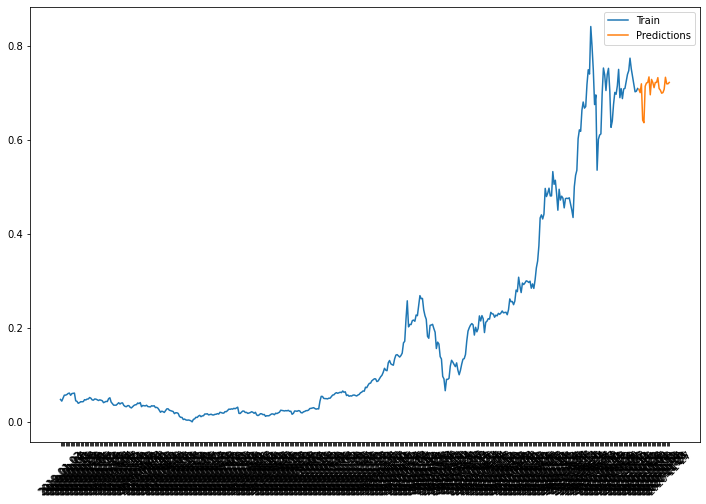

In [ ]:
# plotting the preddictions as appended to the training set - they seem consistent
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(tsla.close[:int(len(tsla["close-25"])-25)])
plt.plot(tsla["pred"][int(len(tsla["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

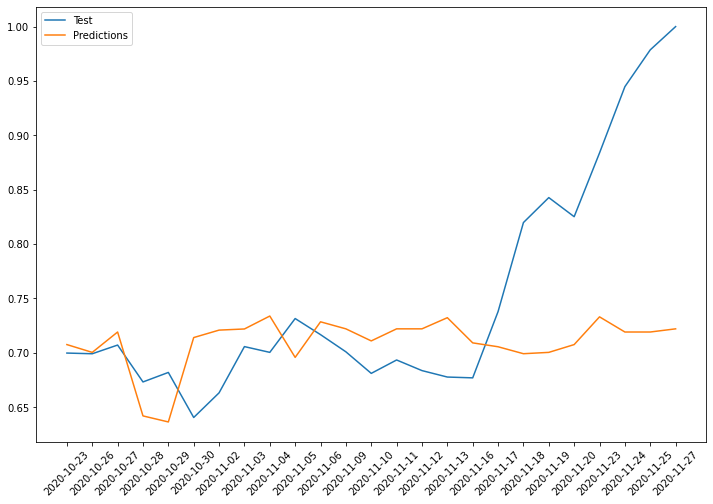

In [ ]:
# plotting the predictions and test data
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_tsla)
plt.plot(tsla["pred"][int(len(tsla["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

##Backtest

##2.2 Linear Regression

In [ ]:
# creating a grid search
grid= {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [ ]:
# creating a linear regression instance
lr = LinearRegression()
# creating a grid search instance with 5 cross validation splits
search = GridSearchCV(lr, grid, cv=5)

In [ ]:
# fitting the grid search to the training data
search.fit(X_train_tsla, y_train_tsla)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# searching for the best parameters and inspecting the score
# the score improved, however it is still bad
print(search.best_params_)
print(search.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
-1.273999094054659


In [ ]:
# creating a linear regression instance with the chosen parameters
lr = LinearRegression(copy_X= True, fit_intercept=True,normalize=True)
# fitting it to the training data
lr.fit(X_train_tsla, y_train_tsla)
# predicting the values
y_pred2_tsla = lr.predict(X_test_tsla)

In [ ]:
# creating a new column in the dataframe
tsla["pred2_tsla"] = np.nan
# filling it with the predictions
tsla["pred2_tsla"][int(len(tsla["close-25"])-25):] = np.array(y_pred2_tsla).squeeze(1)

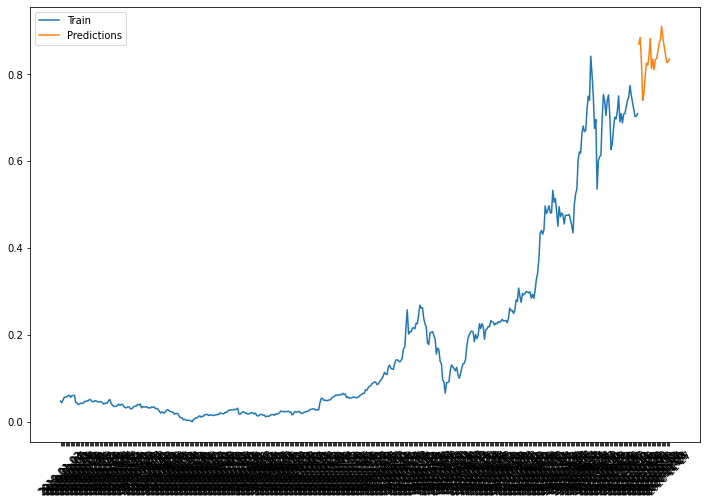

In [ ]:
# plotting the predictions as appended to the training data
# it can be noticed that the linear regression basically copied the last 25 days (so the training data)
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(tsla.close[:int(len(tsla["close-25"])-25)])
plt.plot(tsla["pred2_tsla"][int(len(tsla["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

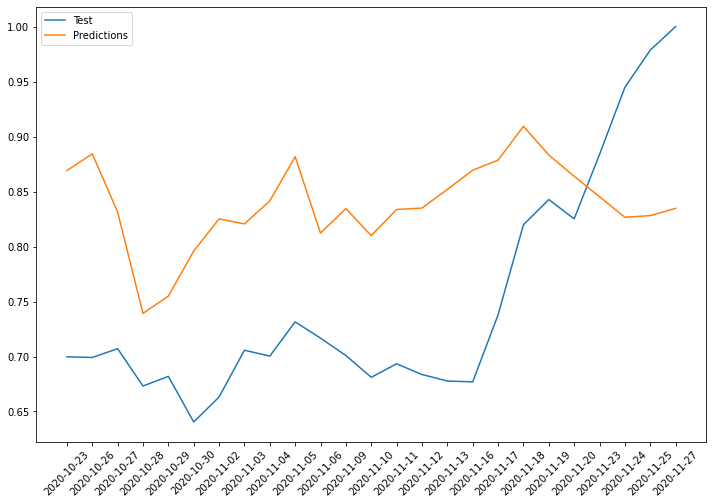

In [ ]:
# plotting the predictions and the test data
# here the values are similar, but the curve is not following the same shape
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_tsla)
plt.plot(tsla["pred2_tsla"][int(len(tsla["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

##Backtest

##3 Neural network for stock predictions

In [ ]:
# creating a new column in the dataframe that contains the same values as the close column
tsla["close-1"] = tsla["close"]
# shifting the values by one day
tsla["close-1"] = tsla["close-1"].shift(1)

In [ ]:
# creating a train and test split (this time using 80% of the data for training)
X_train_tsla = tsla["close-1"][1:int(len(tsla["close-1"])*0.8)]
X_test_tsla = tsla["close-1"][int(len(tsla["close-1"])*0.8):]
y_train_tsla = tsla["close"][1:int(len(tsla["close-1"])*0.8)]
y_test_tsla = tsla["close"][int(len(tsla["close-1"])*0.8):]

In [ ]:
# reshaping the data appropriately
X_train_tsla = X_train_tsla.values.reshape(-1,1)
X_test_tsla = X_test_tsla.values.reshape(-1,1)
y_train_tsla = y_train_tsla.values.reshape(-1,1)

In [ ]:
# reshaping it again to make sure the dimensions are right for the network
X_train_tsla = np.reshape(X_train_tsla, (X_train_tsla.shape[0], 1, 1))
X_test_tsla = np.reshape(X_test_tsla, (X_test_tsla.shape[0], 1, 1))

In [ ]:
# creating a sequential model
model = Sequential()
# adding the firs tLSTM layer with 128 neurons, 0.2 dropout and recurrent dropout and return_sequences = True (to connect another LSTM layer)
model.add(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape = (1,1)))
# adding another LSTM layer - this time 64 neurons and no returning sequences
model.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# adding a dropout layer with 0.5 dropout rate
model.add(layers.Dropout(0.5))
# adding a dense layer with 128 neurons
model.add(layers.Dense(128, activation = "relu"))
# adding a dense layer with 64 neurons
model.add(layers.Dense(64, activation = "relu"))
# adding another dropout layer, this time just 0.2 dropout rate
model.add(layers.Dropout(0.2))
# adding the output layer with one neuron
model.add(layers.Dense(1))

In [ ]:
# viewing the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 128)            66560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [ ]:
# creating an early stopping monitor with the patience of 5 periods
stop = EarlyStopping(monitor = "loss", patience = 5, mode = "min", restore_best_weights=True)
# changing the learning rate of the optimizer
opt = optimizers.Adam(learning_rate=0.001)

In [ ]:
# compiling the model
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
# fitting the model with the batch size of 1 and 50 epochs
history_tsla = model.fit(X_train_tsla, y_train_tsla, epochs=50, batch_size=1, verbose=1, callbacks = [stop])

Epoch 1/50
384/384 [==============================] - 5s 4ms/step - loss: 0.0086
Epoch 2/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0042
Epoch 3/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 4/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0035
Epoch 5/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0040
Epoch 6/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0029
Epoch 7/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0038
Epoch 8/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0042


In [ ]:
# predicting the data
y_pred3_tsla = model.predict(X_test_tsla)

In [ ]:
# creating an empty column
tsla["pred3"] = np.nan
# filling it with the predictions
tsla["pred3"][int(len(tsla["close-1"])*0.8):] = np.array(y_pred3_tsla).squeeze(1)

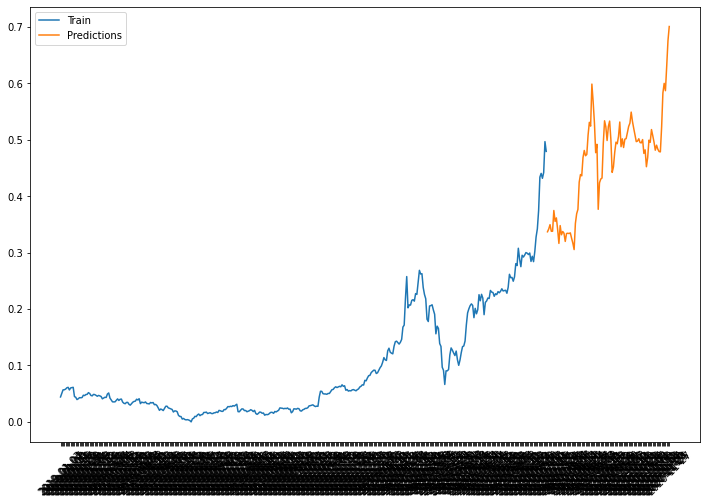

In [ ]:
# plotting the predictions as appended to the training set
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(tsla.close[1:int(len(tsla["close-1"])*0.8)])
plt.plot(tsla["pred3"][int(len(tsla["close-1"])*0.8):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

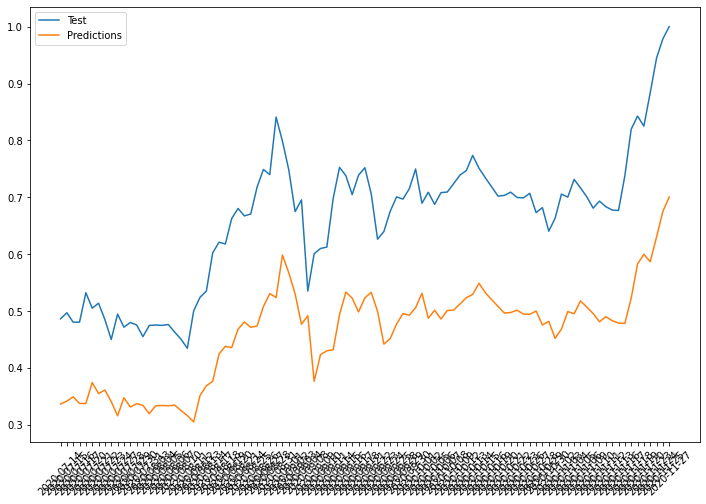

In [ ]:
# plotting the predictions and the test data
# the curves are rather similar
# the model doesn't seem to just mimick the previous day - especially visible looking at the last week
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_tsla)
plt.plot(tsla["pred3"][int(len(tsla["close-1"])*0.8):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# checking the mean squared error
np.sqrt(np.mean(tsla["pred3"][int(len(tsla["close-1"])*0.8):] - y_test_tsla)**2)

0.19688735630086368

##Backtest

#Google

In [ ]:
googl=df.loc[:,['GOOGL']]

In [ ]:
googl=googl.rename(columns={"GOOGL": "close"})

In [ ]:
# creating a minmaxscaler instance
# minmax scaler was chosen as it deals very well with non-normally distributed data
scaler = MinMaxScaler(feature_range=(0, 1))
# scaling the close column
googl['close'] = scaler.fit_transform(googl['close'].values.reshape(-1,1))

In [ ]:
# creating a new column in the dataframe that consists of the same values as the scaled close column
googl["close-25"] = googl["close"]
# shifting the column 25 days back (so roughly a month as we exclude weekends)
googl["close-25"] = googl["close-25"].shift(25)
# inspecting the dataframe
googl.head()

,close,close-25
date,,
2019-01-02,0.038356,NaN
2019-01-03,0.000000,NaN
2019-01-04,0.069070,NaN
2019-01-07,0.066247,NaN
2019-01-08,0.078655,NaN


In [ ]:
# constructing train and test sets, where the test sets contain all the data other than the last 25 periods
X_train_googl = googl["close-25"][25:int(len(googl["close-25"])-25)]
X_test_googl = googl["close-25"][int(len(googl["close-25"])-25):]
y_train_googl = googl["close"][25:int(len(googl["close-25"])-25)]
y_test_googl = googl["close"][int(len(googl["close-25"])-25):]

In [ ]:
# reshaping the train and test values
X_train_googl = X_train_googl.values.reshape(-1,1)
X_test_googl = X_test_googl.values.reshape(-1,1)
y_train_googl = y_train_googl.values.reshape(-1,1)

##2.1 Random Forest

In [ ]:
# creating a grid for the grid search for the random forest regressor
grid_googl = {'n_estimators': list(range(10,101,10)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(10,101,10)),
               'bootstrap': [True, False]}

In [ ]:
# creating a random forest regressor instance
rf_googl = RandomForestRegressor()
# creating a grid search instance with 5 cross validation splits
search_googl = GridSearchCV(rf_googl, grid_googl, cv=5)

In [ ]:
# fitting the search to the training set
search_googl.fit(X_train_googl, y_train_googl)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# printing out the best parameters and their score
# the score is really bad
print(search.best_params_)
print(search.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
-1.273999094054659


In [ ]:
# creating a regression with the selected parameters
rf_googl = RandomForestRegressor(bootstrap= True, max_depth = 10, max_features = "sqrt", n_estimators = 60)
# fitting it to the training set
rf_googl.fit(X_train_googl, y_train_googl)
# predicting the values
y_pred_googl = rf_googl.predict(X_test_googl)

In [ ]:
# creating a new column in the dataframe
googl["pred"] = np.nan
# filling the column with the predicted values
googl["pred"][int(len(googl["close-25"])-25):] = y_pred_googl

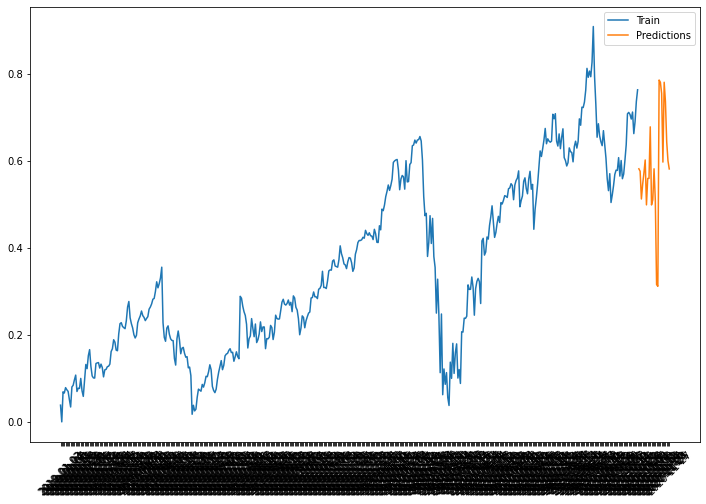

In [ ]:
# plotting the preddictions as appended to the training set - they seem consistent
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(googl.close[:int(len(googl["close-25"])-25)])
plt.plot(googl["pred"][int(len(googl["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

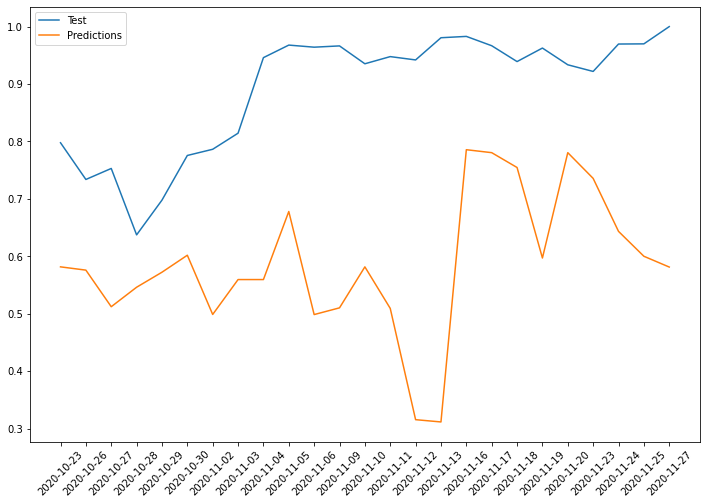

In [ ]:
# plotting the predictions and test data
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_googl)
plt.plot(googl["pred"][int(len(googl["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# inspecting the trainig data
googl["close"][:int(len(googl["close-25"])-25)].describe()

count    457.000000
mean       0.351910
std        0.204939
min        0.000000
25%        0.186685
50%        0.305876
75%        0.536603
max        0.908568
Name: close, dtype: float64

In [ ]:
# inspecting the test data
# the mean here is considerably lower
googl["close"][int(len(googl["close-25"])-25):].describe()

count    25.000000
mean      0.891686
std       0.105820
min       0.637292
25%       0.797728
50%       0.941960
75%       0.966700
max       1.000000
Name: close, dtype: float64

##Backtest

##2.2 Linear Regression

In [ ]:
# creating a grid search
grid_googl = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [ ]:
# creating a linear regression instance
lr_googl = LinearRegression()
# creating a grid search instance with 5 cross validation splits
search_googl = GridSearchCV(lr_googl, grid_googl, cv=5)

In [ ]:
# fitting the grid search to the training data
search_googl.fit(X_train_googl, y_train_googl)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# searching for the best parameters and inspecting the score
# the score improved, however it is still bad
print(search.best_params_)
print(search.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
-1.273999094054659


In [ ]:
# creating a linear regression instance with the chosen parameters
lr_googl = LinearRegression(copy_X= True, fit_intercept=True,normalize=True)
# fitting it to the training data
lr_googl.fit(X_train_googl, y_train_googl)
# predicting the values
y_pred2_googl = lr_googl.predict(X_test_googl)

In [ ]:
# creating a new column in the dataframe
googl["pred2"] = np.nan
# filling it with the predictions
googl["pred2"][int(len(googl["close-25"])-25):] = np.array(y_pred2_googl).squeeze(1)

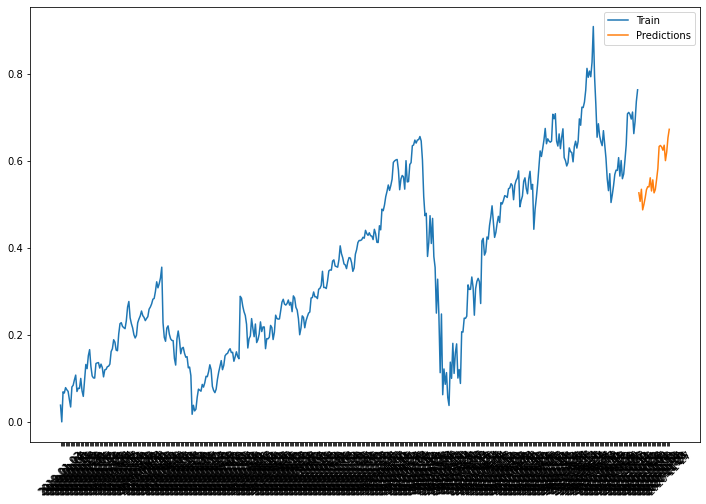

In [ ]:
# plotting the predictions as appended to the training data
# it can be noticed that the linear regression basically copied the last 25 days (so the training data)
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(googl.close[:int(len(googl["close-25"])-25)])
plt.plot(googl["pred2"][int(len(googl["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

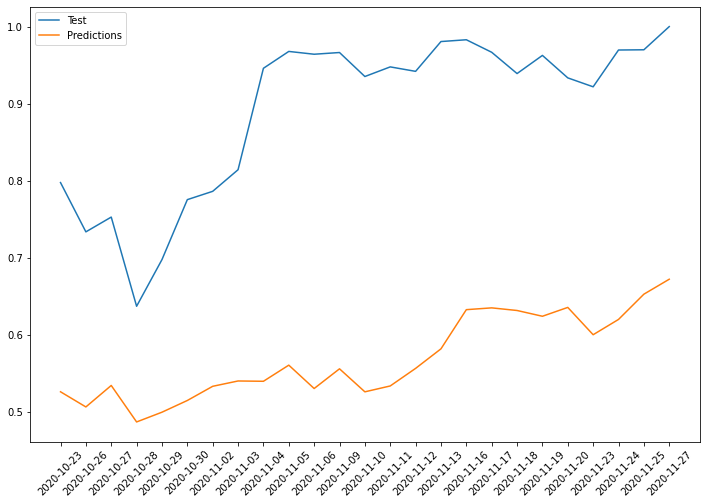

In [ ]:
# plotting the predictions and the test data
# here the values are similar, but the curve is not following the same shape
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_googl)
plt.plot(googl["pred2"][int(len(googl["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

##Backtest

##3 Neural network for stock predictions

In [ ]:
# creating a new column in the dataframe that contains the same values as the close column
googl["close-1"] = googl["close"]
# shifting the values by one day
googl["close-1"] = googl["close-1"].shift(1)

In [ ]:
# creating a train and test split (this time using 80% of the data for training)
X_train_googl = googl["close-1"][1:int(len(googl["close-1"])*0.8)]
X_test_googl = googl["close-1"][int(len(googl["close-1"])*0.8):]
y_train_googl = googl["close"][1:int(len(googl["close-1"])*0.8)]
y_test_googl = googl["close"][int(len(googl["close-1"])*0.8):]

In [ ]:
# reshaping the data appropriately
X_train_googl = X_train_googl.values.reshape(-1,1)
X_test_googl = X_test_googl.values.reshape(-1,1)
y_train_googl = y_train_googl.values.reshape(-1,1)

In [ ]:
# reshaping it again to make sure the dimensions are right for the network
X_train_googl = np.reshape(X_train_googl, (X_train_googl.shape[0], 1, 1))
X_test_googl = np.reshape(X_test_googl, (X_test_googl.shape[0], 1, 1))

In [ ]:
# creating a sequential model
model_googl = Sequential()
# adding the firs tLSTM layer with 128 neurons, 0.2 dropout and recurrent dropout and return_sequences = True (to connect another LSTM layer)
model_googl.add(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape = (1,1)))
# adding another LSTM layer - this time 64 neurons and no returning sequences
model_googl.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# adding a dropout layer with 0.5 dropout rate
model_googl.add(layers.Dropout(0.5))
# adding a dense layer with 128 neurons
model_googl.add(layers.Dense(128, activation = "relu"))
# adding a dense layer with 64 neurons
model_googl.add(layers.Dense(64, activation = "relu"))
# adding another dropout layer, this time just 0.2 dropout rate
model_googl.add(layers.Dropout(0.2))
# adding the output layer with one neuron
model_googl.add(layers.Dense(1))

In [ ]:
# viewing the summary of the model
model_googl.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1, 128)            66560     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [ ]:
# creating an early stopping monitor with the patience of 5 periods
stop_googl = EarlyStopping(monitor = "loss", patience = 5, mode = "min", restore_best_weights=True)
# changing the learning rate of the optimizer
opt_googl = optimizers.Adam(learning_rate=0.001)

In [ ]:
# compiling the model
model_googl.compile(loss='mean_squared_error', optimizer=opt_googl)

In [ ]:
# fitting the model with the batch size of 1 and 50 epochs
history_googl = model_googl.fit(X_train_googl, y_train_googl, epochs=50, batch_size=1, verbose=1, callbacks = [stop_googl])

Epoch 1/50
384/384 [==============================] - 5s 4ms/step - loss: 0.0405
Epoch 2/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0122
Epoch 3/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0129
Epoch 4/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0123
Epoch 5/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0131
Epoch 6/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0116
Epoch 7/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0152
Epoch 8/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0117
Epoch 9/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0110
Epoch 10/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0101
Epoch 11/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0126
Epoch 12/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0083
Epoch 13/50
384/384 [====

In [ ]:
# predicting the data
y_pred3_googl = model_googl.predict(X_test_googl)

In [ ]:
# creating an empty column
googl["pred3"] = np.nan
# filling it with the predictions
googl["pred3"][int(len(googl["close-1"])*0.8):] = np.array(y_pred3_googl).squeeze(1)

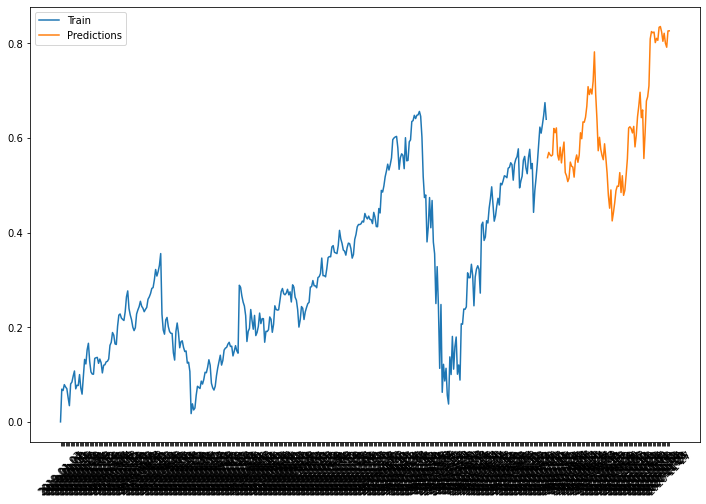

In [ ]:
# plotting the predictions as appended to the training set
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(googl.close[1:int(len(googl["close-1"])*0.8)])
plt.plot(googl["pred3"][int(len(googl["close-1"])*0.8):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

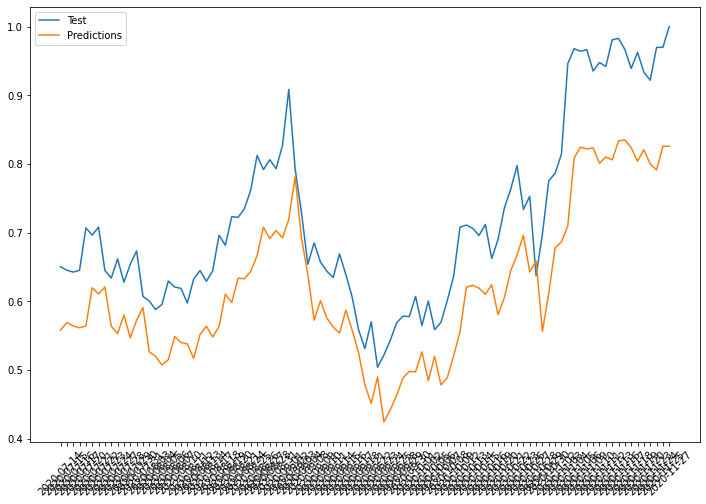

In [ ]:
# plotting the predictions and the test data
# the curves are rather similar
# the model doesn't seem to just mimick the previous day - especially visible looking at the last week
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_googl)
plt.plot(googl["pred3"][int(len(googl["close-1"])*0.8):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# checking the mean squared error
np.sqrt(np.mean(googl["pred3"][int(len(googl["close-1"])*0.8):] - y_test_googl)**2)

0.09871756456374743

##Backtest

#Alxn

In [ ]:
alxn=df.loc[:,['ALXN']]

In [ ]:
alxn=alxn.rename(columns={"ALXN": "close"})

In [ ]:
# creating a minmaxscaler instance
# minmax scaler was chosen as it deals very well with non-normally distributed data
scaler_alxn = MinMaxScaler(feature_range=(0, 1))
# scaling the close column
alxn['close'] = scaler_alxn.fit_transform(alxn['close'].values.reshape(-1,1))

In [ ]:
# creating a new column in the dataframe that consists of the same values as the scaled close column
alxn["close-25"] = alxn["close"]
# shifting the column 25 days back (so roughly a month as we exclude weekends)
alxn["close-25"] = alxn["close-25"].shift(25)
# inspecting the dataframe
alxn.head()

,close,close-25
date,,
2019-01-02,0.342105,NaN
2019-01-03,0.374962,NaN
2019-01-04,0.463036,NaN
2019-01-07,0.492546,NaN
2019-01-08,0.502738,NaN


In [ ]:
# constructing train and test sets, where the test sets contain all the data other than the last 25 periods
X_train_alxn = alxn["close-25"][25:int(len(alxn["close-25"])-25)]
X_test_alxn = alxn["close-25"][int(len(alxn["close-25"])-25):]
y_train_alxn = alxn["close"][25:int(len(alxn["close-25"])-25)]
y_test_alxn = alxn["close"][int(len(alxn["close-25"])-25):]

In [ ]:
# reshaping the train and test values
X_train_alxn = X_train_alxn.values.reshape(-1,1)
X_test_alxn = X_test_alxn.values.reshape(-1,1)
y_train_alxn = y_train_alxn.values.reshape(-1,1)

AttributeError: ignored

##2.1 Random Forest

In [ ]:
# creating a grid for the grid search for the random forest regressor
grid_alxn = {'n_estimators': list(range(10,101,10)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(10,101,10)),
               'bootstrap': [True, False]}

In [ ]:
# creating a random forest regressor instance
rf_alxn = RandomForestRegressor()
# creating a grid search instance with 5 cross validation splits
search_alxn = GridSearchCV(rf_alxn, grid_alxn, cv=5)

In [ ]:
# fitting the search to the training set
search_alxn.fit(X_train_alxn, y_train_alxn)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# printing out the best parameters and their score
# the score is really bad
print(search.best_params_)
print(search.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
-1.273999094054659


In [ ]:
# creating a regression with the selected parameters
rf_alxn = RandomForestRegressor(bootstrap= True, max_depth = 10, max_features = "sqrt", n_estimators = 60)
# fitting it to the training set
rf_alxn.fit(X_train_alxn, y_train_alxn)
# predicting the values
y_pred_alxn = rf_alxn.predict(X_test_alxn)

In [ ]:
# creating a new column in the dataframe
alxn["pred"] = np.nan
# filling the column with the predicted values
alxn["pred"][int(len(alxn["close-25"])-25):] = y_pred_alxn

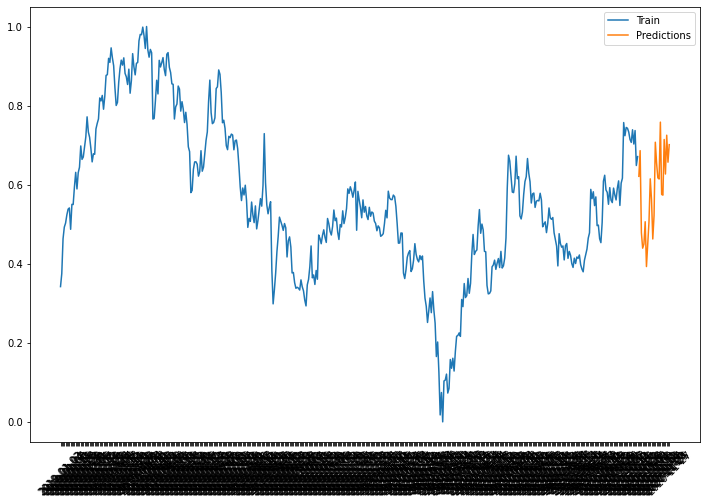

In [ ]:
# plotting the preddictions as appended to the training set - they seem consistent
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(alxn.close[:int(len(alxn["close-25"])-25)])
plt.plot(alxn["pred"][int(len(alxn["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

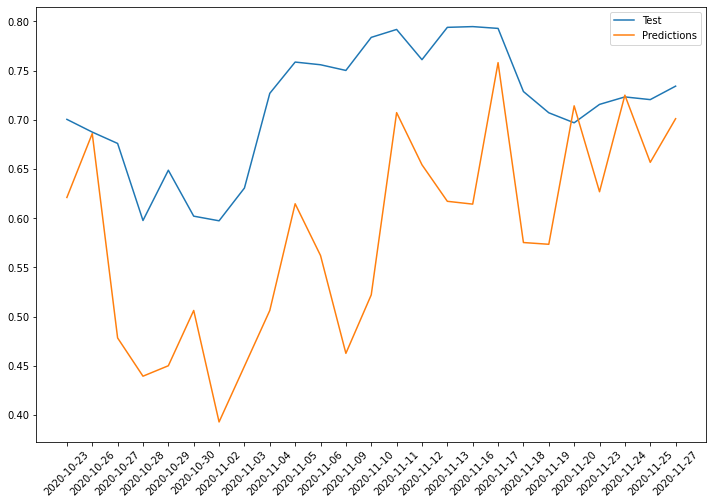

In [ ]:
# plotting the predictions and test data
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_alxn)
plt.plot(alxn["pred"][int(len(alxn["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# inspecting the trainig data
alxn["close"][:int(len(alxn["close-25"])-25)].describe()

count    457.000000
mean       0.560617
std        0.194683
min        0.000000
25%        0.431244
50%        0.541071
75%        0.691664
max        1.000000
Name: close, dtype: float64

In [ ]:
# inspecting the test data
# the mean here is considerably lower
alxn["close"][int(len(alxn["close-25"])-25):].describe()

count    25.000000
mean      0.715120
std       0.061865
min       0.597353
25%       0.687557
50%       0.723304
75%       0.758747
max       0.794798
Name: close, dtype: float64

##Backtest

##2.2 Linear Regression

In [ ]:
# creating a grid search
grid_alxn = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [ ]:
# creating a linear regression instance
lr_alxn = LinearRegression()
# creating a grid search instance with 5 cross validation splits
search_alxn = GridSearchCV(lr_alxn, grid_alxn, cv=5)

In [ ]:
# fitting the grid search to the training data
search_alxn.fit(X_train_alxn, y_train_alxn)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# searching for the best parameters and inspecting the score
# the score improved, however it is still bad
print(search.best_params_)
print(search.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
-1.273999094054659


In [ ]:
# creating a linear regression instance with the chosen parameters
lr_alxn = LinearRegression(copy_X= True, fit_intercept=True,normalize=True)
# fitting it to the training data
lr_alxn.fit(X_train_alxn, y_train_alxn)
# predicting the values
y_pred2_alxn = lr_alxn.predict(X_test_alxn)

In [ ]:
# creating a new column in the dataframe
alxn["pred2"] = np.nan
# filling it with the predictions
alxn["pred2"][int(len(alxn["close-25"])-25):] = np.array(y_pred2_alxn).squeeze(1)

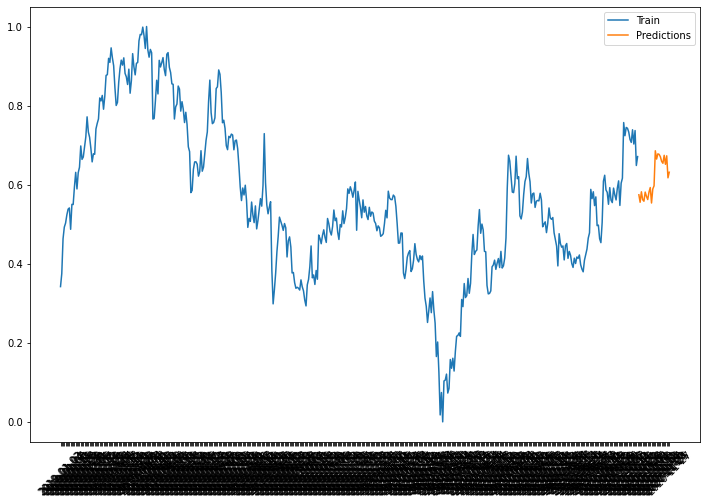

In [ ]:
# plotting the predictions as appended to the training data
# it can be noticed that the linear regression basically copied the last 25 days (so the training data)
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(alxn.close[:int(len(alxn["close-25"])-25)])
plt.plot(alxn["pred2"][int(len(alxn["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

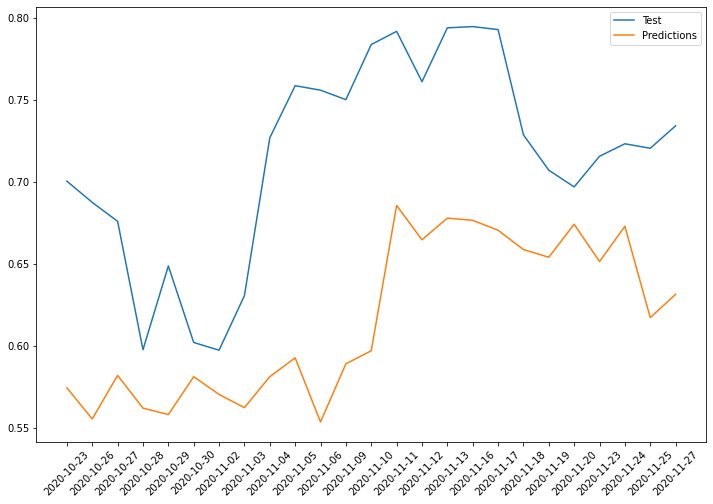

In [ ]:
# plotting the predictions and the test data
# here the values are similar, but the curve is not following the same shape
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_alxn)
plt.plot(alxn["pred2"][int(len(alxn["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

##Backtest

##3 Neural network for stock predictions

In [ ]:
# creating a new column in the dataframe that contains the same values as the close column
alxn["close-1"] = alxn["close"]
# shifting the values by one day
alxn["close-1"] = alxn["close-1"].shift(1)

In [ ]:
# creating a train and test split (this time using 80% of the data for training)
X_train_alxn = alxn["close-1"][1:int(len(alxn["close-1"])*0.8)]
X_test_alxn = alxn["close-1"][int(len(alxn["close-1"])*0.8):]
y_train_alxn = alxn["close"][1:int(len(alxn["close-1"])*0.8)]
y_test_alxn = alxn["close"][int(len(alxn["close-1"])*0.8):]

In [ ]:
# reshaping the data appropriately
X_train_alxn = X_train_alxn.values.reshape(-1,1)
X_test_alxn = X_test_alxn.values.reshape(-1,1)
y_train_alxn = y_train_alxn.values.reshape(-1,1)

In [ ]:
# reshaping it again to make sure the dimensions are right for the network
X_train_alxn = np.reshape(X_train_alxn, (X_train_alxn.shape[0], 1, 1))
X_test_alxn = np.reshape(X_test_alxn, (X_test_alxn.shape[0], 1, 1))

In [ ]:
# creating a sequential model
model_alxn = Sequential()
# adding the firs tLSTM layer with 128 neurons, 0.2 dropout and recurrent dropout and return_sequences = True (to connect another LSTM layer)
model_alxn.add(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape = (1,1)))
# adding another LSTM layer - this time 64 neurons and no returning sequences
model_alxn.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# adding a dropout layer with 0.5 dropout rate
model_alxn.add(layers.Dropout(0.5))
# adding a dense layer with 128 neurons
model_alxn.add(layers.Dense(128, activation = "relu"))
# adding a dense layer with 64 neurons
model_alxn.add(layers.Dense(64, activation = "relu"))
# adding another dropout layer, this time just 0.2 dropout rate
model_alxn.add(layers.Dropout(0.2))
# adding the output layer with one neuron
model_alxn.add(layers.Dense(1))

In [ ]:
# viewing the summary of the model
model_alxn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 128)            66560     
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [ ]:
# creating an early stopping monitor with the patience of 5 periods
stop_alxn = EarlyStopping(monitor = "loss", patience = 5, mode = "min", restore_best_weights=True)
# changing the learning rate of the optimizer
opt_alxn = optimizers.Adam(learning_rate=0.001)

In [ ]:
# compiling the model
model_alxn.compile(loss='mean_squared_error', optimizer=opt_alxn)

In [ ]:
# fitting the model with the batch size of 1 and 50 epochs
history_alxn = model_alxn.fit(X_train_alxn, y_train_alxn, epochs=50, batch_size=1, verbose=1, callbacks = [stop_alxn])

Epoch 1/50
384/384 [==============================] - 5s 5ms/step - loss: 0.1094
Epoch 2/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0478
Epoch 3/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0240
Epoch 4/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0253
Epoch 5/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0205
Epoch 6/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0204
Epoch 7/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0225
Epoch 8/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0187
Epoch 9/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0185
Epoch 10/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0193
Epoch 11/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0198
Epoch 12/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0157
Epoch 13/50
384/384 [====

In [ ]:
# predicting the data
y_pred3_alxn = model_alxn.predict(X_test_alxn)

In [ ]:
# creating an empty column
alxn["pred3"] = np.nan
# filling it with the predictions
alxn["pred3"][int(len(alxn["close-1"])*0.8):] = np.array(y_pred3_alxn).squeeze(1)

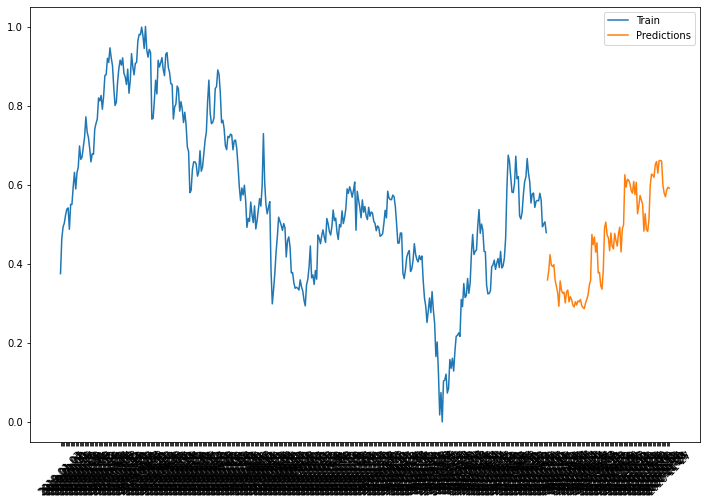

In [ ]:
# plotting the predictions as appended to the training set
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(alxn.close[1:int(len(alxn["close-1"])*0.8)])
plt.plot(alxn["pred3"][int(len(alxn["close-1"])*0.8):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

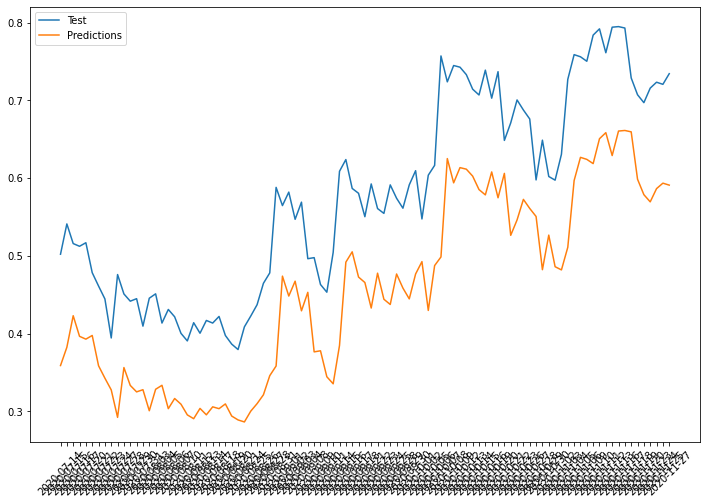

In [ ]:
# plotting the predictions and the test data
# the curves are rather similar
# the model doesn't seem to just mimick the previous day - especially visible looking at the last week
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_alxn)
plt.plot(alxn["pred3"][int(len(alxn["close-1"])*0.8):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# checking the mean squared error
np.sqrt(np.mean(alxn["pred3"][int(len(alxn["close-1"])*0.8):] - y_test_alxn)**2)

0.12220676749516579

##Backtest

#Amazon

In [ ]:
amzn=df.loc[:,['AMZN']]

In [ ]:
amzn=amzn.rename(columns={"AMZN": "close"})

In [ ]:
# creating a minmaxscaler instance
# minmax scaler was chosen as it deals very well with non-normally distributed data
scaler = MinMaxScaler(feature_range=(0, 1))
# scaling the close column
amzn['close'] = scaler.fit_transform(amzn['close'].values.reshape(-1,1))

In [ ]:
# creating a new column in the dataframe that consists of the same values as the scaled close column
amzn["close-25"] = amzn["close"]
# shifting the column 25 days back (so roughly a month as we exclude weekends)
amzn["close-25"] = amzn["close-25"].shift(25)
# inspecting the dataframe
amzn.head()

,close,close-25
date,,
2019-01-02,0.019127,NaN
2019-01-03,0.000000,NaN
2019-01-04,0.036979,NaN
2019-01-07,0.063623,NaN
2019-01-08,0.076951,NaN


In [ ]:
# constructing train and test sets, where the test sets contain all the data other than the last 25 periods
X_train_amzn = amzn["close-25"][25:int(len(amzn["close-25"])-25)]
X_test_amzn = amzn["close-25"][int(len(amzn["close-25"])-25):]
y_train_amzn = amzn["close"][25:int(len(amzn["close-25"])-25)]
y_test_amzn = amzn["close"][int(len(amzn["close-25"])-25):]

In [ ]:
# reshaping the train and test values
X_train_amzn = X_train_amzn.values.reshape(-1,1)
X_test_amzn = X_test_amzn.values.reshape(-1,1)
y_train_amzn = y_train_amzn.values.reshape(-1,1)

##2.1 Random Forest

In [ ]:
# creating a grid for the grid search for the random forest regressor
grid_amzn = {'n_estimators': list(range(10,101,10)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(10,101,10)),
               'bootstrap': [True, False]}

In [ ]:
# creating a random forest regressor instance
rf_amzn = RandomForestRegressor()
# creating a grid search instance with 5 cross validation splits
search_amzn = GridSearchCV(rf_amzn, grid_amzn, cv=5)

In [ ]:
# fitting the search to the training set
search_amzn.fit(X_train_amzn, y_train_amzn)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# printing out the best parameters and their score
# the score is really bad
print(search.best_params_)
print(search.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
-1.273999094054659


In [ ]:
# creating a regression with the selected parameters
rf_amzn = RandomForestRegressor(bootstrap= True, max_depth = 10, max_features = "sqrt", n_estimators = 60)
# fitting it to the training set
rf_amzn.fit(X_train_amzn, y_train_amzn)
# predicting the values
y_pred_amzn = rf_amzn.predict(X_test_amzn)

In [ ]:
# creating a new column in the dataframe
amzn["pred"] = np.nan
# filling the column with the predicted values
amzn["pred"][int(len(amzn["close-25"])-25):] = y_pred_amzn

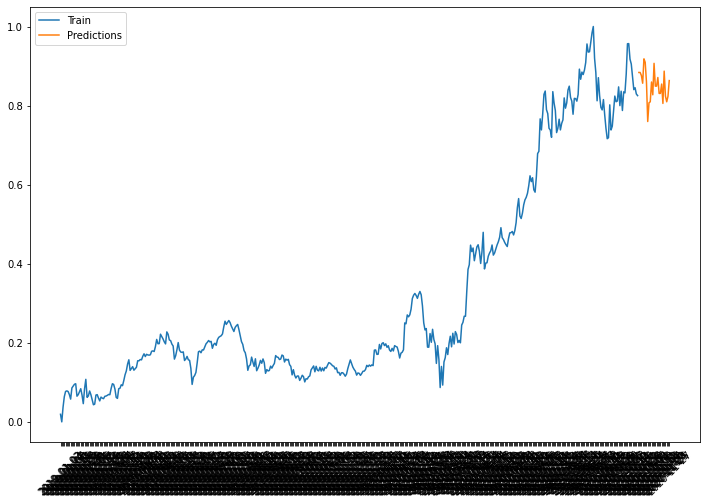

In [ ]:
# plotting the preddictions as appended to the training set - they seem consistent
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(amzn.close[:int(len(amzn["close-25"])-25)])
plt.plot(amzn["pred"][int(len(amzn["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

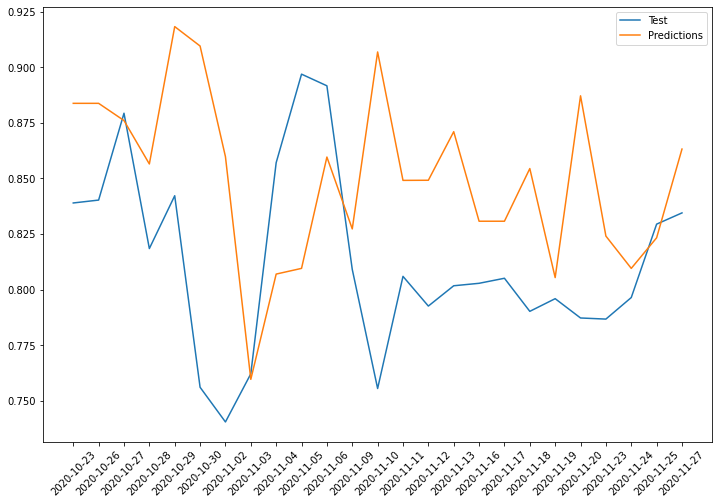

In [ ]:
# plotting the predictions and test data
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_amzn)
plt.plot(amzn["pred"][int(len(amzn["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# inspecting the trainig data
amzn["close"][:int(len(amzn["close-25"])-25)].describe()

count    457.000000
mean       0.313721
std        0.264075
min        0.000000
25%        0.136276
50%        0.189201
75%        0.446989
max        1.000000
Name: close, dtype: float64

In [ ]:
# inspecting the test data
# the mean here is considerably lower
amzn["close"][int(len(amzn["close-25"])-25):].describe()

count    25.000000
mean      0.812711
std       0.040903
min       0.740558
25%       0.790274
50%       0.805142
75%       0.838984
max       0.896882
Name: close, dtype: float64

##Backtest

##2.2 Linear Regression

In [ ]:
# creating a grid search
grid_amzn = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [ ]:
# creating a linear regression instance
lr_amzn = LinearRegression()
# creating a grid search instance with 5 cross validation splits
search_amzn = GridSearchCV(lr_amzn, grid_amzn, cv=5)

In [ ]:
# fitting the grid search to the training data
search_amzn.fit(X_train_amzn, y_train_amzn)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# searching for the best parameters and inspecting the score
# the score improved, however it is still bad
print(search.best_params_)
print(search.best_score_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}
-1.273999094054659


In [ ]:
# creating a linear regression instance with the chosen parameters
lr_amzn = LinearRegression(copy_X= True, fit_intercept=True,normalize=True)
# fitting it to the training data
lr_amzn.fit(X_train_amzn, y_train_amzn)
# predicting the values
y_pred2_amzn = lr_amzn.predict(X_test_amzn)

In [ ]:
# creating a new column in the dataframe
amzn["pred2"] = np.nan
# filling it with the predictions
amzn["pred2"][int(len(amzn["close-25"])-25):] = np.array(y_pred2_amzn).squeeze(1)

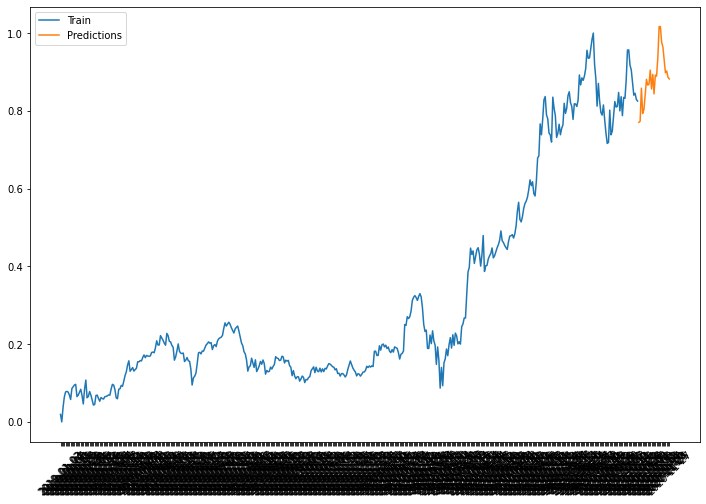

In [ ]:
# plotting the predictions as appended to the training data
# it can be noticed that the linear regression basically copied the last 25 days (so the training data)
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(amzn.close[:int(len(amzn["close-25"])-25)])
plt.plot(amzn["pred2"][int(len(amzn["close-25"])-25):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

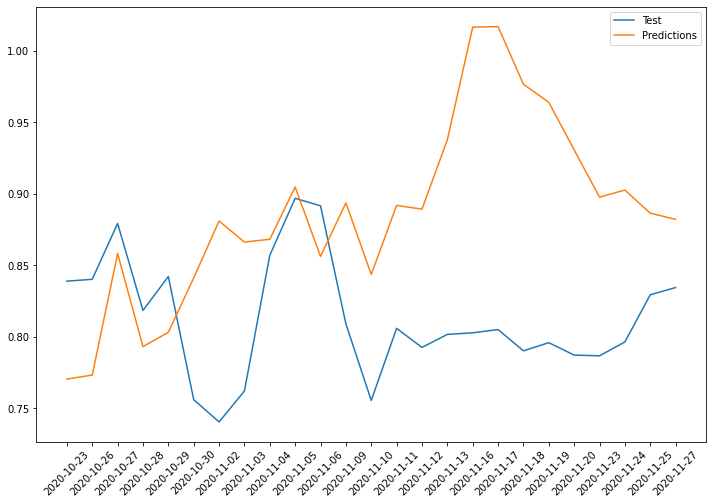

In [ ]:
# plotting the predictions and the test data
# here the values are similar, but the curve is not following the same shape
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_amzn)
plt.plot(amzn["pred2"][int(len(amzn["close-25"])-25):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

##Backtest

##3 Neural network for stock predictions

In [ ]:
# creating a new column in the dataframe that contains the same values as the close column
amzn["close-1"] = amzn["close"]
# shifting the values by one day
amzn["close-1"] = amzn["close-1"].shift(1)

In [ ]:
# creating a train and test split (this time using 80% of the data for training)
X_train_amzn = amzn["close-1"][1:int(len(amzn["close-1"])*0.8)]
X_test_amzn = amzn["close-1"][int(len(amzn["close-1"])*0.8):]
y_train_amzn = amzn["close"][1:int(len(amzn["close-1"])*0.8)]
y_test_amzn = amzn["close"][int(len(amzn["close-1"])*0.8):]

In [ ]:
# reshaping the data appropriately
X_train_amzn = X_train_amzn.values.reshape(-1,1)
X_test_amzn = X_test_amzn.values.reshape(-1,1)
y_train_amzn = y_train_amzn.values.reshape(-1,1)

In [ ]:
# reshaping it again to make sure the dimensions are right for the network
X_train_amzn = np.reshape(X_train_amzn, (X_train_amzn.shape[0], 1, 1))
X_test_amzn = np.reshape(X_test_amzn, (X_test_amzn.shape[0], 1, 1))

In [ ]:
# creating a sequential model
model_amzn = Sequential()
# adding the firs tLSTM layer with 128 neurons, 0.2 dropout and recurrent dropout and return_sequences = True (to connect another LSTM layer)
model_amzn.add(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape = (1,1)))
# adding another LSTM layer - this time 64 neurons and no returning sequences
model_amzn.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# adding a dropout layer with 0.5 dropout rate
model_amzn.add(layers.Dropout(0.5))
# adding a dense layer with 128 neurons
model_amzn.add(layers.Dense(128, activation = "relu"))
# adding a dense layer with 64 neurons
model_amzn.add(layers.Dense(64, activation = "relu"))
# adding another dropout layer, this time just 0.2 dropout rate
model_amzn.add(layers.Dropout(0.2))
# adding the output layer with one neuron
model_amzn.add(layers.Dense(1))

In [ ]:
# viewing the summary of the model
model_amzn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 1, 128)            66560     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [ ]:
# creating an early stopping monitor with the patience of 5 periods
stop_amzn = EarlyStopping(monitor = "loss", patience = 5, mode = "min", restore_best_weights=True)
# changing the learning rate of the optimizer
opt_amzn = optimizers.Adam(learning_rate=0.001)

In [ ]:
# compiling the model
model_amzn.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
# fitting the model with the batch size of 1 and 50 epochs
history_amzn = model_amzn.fit(X_train_amzn, y_train_amzn, epochs=50, batch_size=1, verbose=1, callbacks = [stop_amzn])

Epoch 1/50
384/384 [==============================] - 5s 5ms/step - loss: 0.0155
Epoch 2/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0167
Epoch 3/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0069
Epoch 4/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0093
Epoch 5/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0117
Epoch 6/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0079
Epoch 7/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0067
Epoch 8/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0069


In [ ]:
# predicting the data
y_pred3_amzn = model.predict(X_test_amzn)

In [ ]:
# creating an empty column
amzn["pred3"] = np.nan
# filling it with the predictions
amzn["pred3"][int(len(amzn["close-1"])*0.8):] = np.array(y_pred3_amzn).squeeze(1)

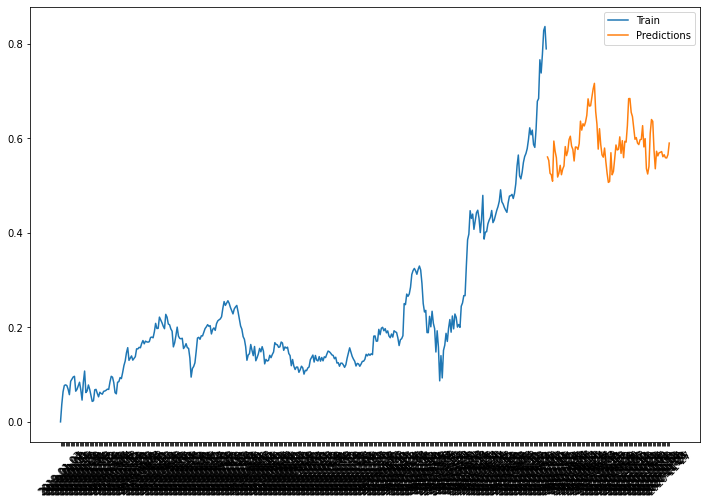

In [ ]:
# plotting the predictions as appended to the training set
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(amzn.close[1:int(len(amzn["close-1"])*0.8)])
plt.plot(amzn["pred3"][int(len(amzn["close-1"])*0.8):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

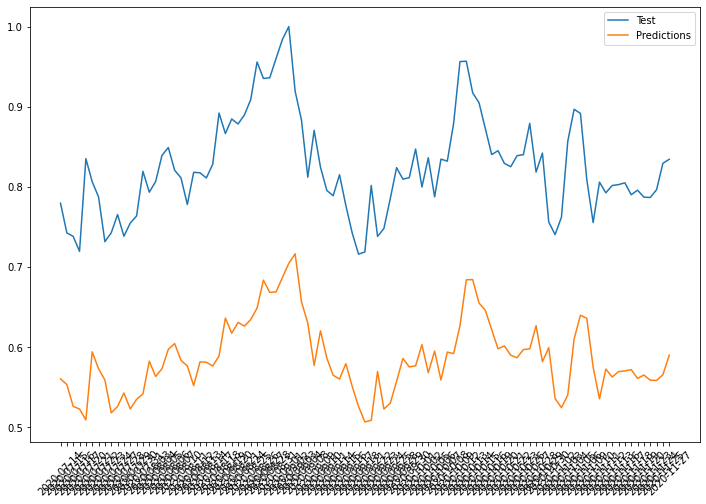

In [ ]:
# plotting the predictions and the test data
# the curves are rather similar
# the model doesn't seem to just mimick the previous day - especially visible looking at the last week
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test_amzn)
plt.plot(amzn["pred3"][int(len(amzn["close-1"])*0.8):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# checking the mean squared error
np.sqrt(np.mean(amzn["pred3"][int(len(amzn["close-1"])*0.8):] - y_test_amzn)**2)

0.2385568897487918

##Backtest